# Лабораторная работа 2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

## Dataset Description

Source: https://www.kaggle.com/datasets/HRAnalyticRepository/employee-attrition-data    

Fake termination data which can be used to try to predict employee attrition

|#|Attribute name|Attribute Information| Usage in model|
| :------: | :------ | :------ |:------|
|1|EmployeeID| Unique id (Categoryl)| not used |
|2|recorddate_key| date when record was made (Category)| not used |
|3|birthdate_key| Birthday date (Category)| not used |
|4|orighiredate_key| Hiring date (Category), results in length_of_service | not used |
|5|terminationdate_key| Tremination date (Category) The termination date=1/1/1900 if STATUS=active| not used |
|6|*age*| Age (Numerical)|used as it is|
|7|*length_of_service*| Work Experience in years (Numerical)|used as it is|
|8|*city_name*| City name (Category)| not used |
|9|*department_name*| Department name (Category) |used as 0/1, reduced to 2 types of dept|  
|10|*job_title*| Anonymised Category for the customer (category)|used as dummies, reduced to 4 types of jobs| 
|11|*store_name*| Store name (Category) already represented as numeric | used as it is | 
|12|*gender_short*|Gender (Binary)| used as 0/1 | 
|13|gender_full| Gender (Binary)| not used| 
|14|termreason_desc| result of termination, could be used as target(Category)| not used | 
|15|termtype_desc| type of termination, could be used as target (Category)| not used | 
|16|STATUS_YEAR| same as recorddate_key (Category)| not used | 
|17|__Target__: STATUS| 2 types of status: active or terminated (category)| used as 0/1 | 
|18|BUSINESS_UNIT| Business unit (Category), has only 2 values so we can make it Binary | used as 0/1 | 

In [4]:
data_df = pd.read_csv("./data/MFG10YearTerminationData.csv")

In [4]:
data_df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [17]:
data_df[data_df['EmployeeID'] == 8279 ]

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
47999,8279,12/31/2013 0:00,7/18/1994,9/15/2013,12/30/2015,19,0,White Rock,Customer Service,Cashier,39,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
48000,8279,12/31/2014 0:00,7/18/1994,9/15/2013,12/30/2015,20,1,White Rock,Customer Service,Cashier,39,F,Female,Not Applicable,Not Applicable,2014,ACTIVE,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES


In [5]:
print(data_df['termreason_desc'].unique())
print(data_df['termtype_desc'].unique())

['Not Applicable' 'Retirement' 'Resignaton' 'Layoff']
['Not Applicable' 'Voluntary' 'Involuntary']


In [19]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

<AxesSubplot:>

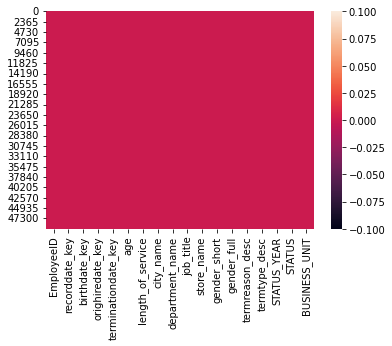

In [20]:
sns.heatmap(data_df.isnull())

ACTIVE        48168
TERMINATED     1485
Name: STATUS, dtype: int64


[Text(0.5, 1.0, 'Countplot of target')]

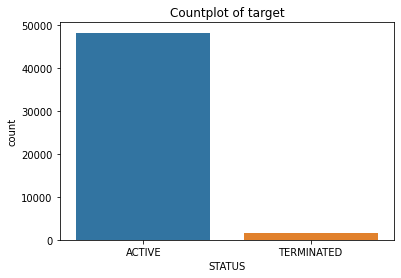

In [21]:
print(data_df['STATUS'].value_counts())
sns.countplot(x = data_df['STATUS'], data = data_df).set(title='Countplot of target')

## Data preparation

In [5]:
# Leave only useful columns
data_df = data_df[['age', 'length_of_service',
       'department_name', 'job_title', 'store_name', 'gender_short', 'BUSINESS_UNIT', 'STATUS']]

In [6]:
data_df[:2]

,age,length_of_service,department_name,job_title,store_name,gender_short,BUSINESS_UNIT,STATUS
0,52,17,Executive,CEO,35,M,HEADOFFICE,ACTIVE
1,53,18,Executive,CEO,35,M,HEADOFFICE,ACTIVE


In [101]:
# Look at full list of job titles and frequency
data_df.job_title.value_counts()

Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Bakery Manager                      285
Meats Manager                       285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Labor Relations Analyst              30
Accounts Receiveable Clerk           30
Trainer                              26
Accounts Payable Clerk               25
Auditor                              20
Systems Analyst                      20
Investment Analyst                   20
Compensation Analyst                 20
Corporate Lawyer                     17


In [7]:
# The jobs can be separated according to corporate hierarchy
employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']

executive = ['Exec Assistant, Finance', 'Exec Assistant, Legal Counsel',
             'CHief Information Officer', 'CEO', 'Exec Assistant, Human Resources',
             'Exec Assistant, VP Stores']

direction = ['VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance',
         'Director, Accounts Receivable', 'Director, Accounting',
         'Director, Employee Records', 'Director, Accounts Payable',
         'Director, HR Technology', 'Director, Investments',
         'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']

In [8]:
# Replace jobs with new categories
data_df['jobs'] = data_df.job_title

data_df.jobs = data_df.jobs.replace(employee, 'employee')
data_df.jobs = data_df.jobs.replace(manager, 'manager')
data_df.jobs = data_df.jobs.replace(executive, 'executive')
data_df.jobs = data_df.jobs.replace(direction, 'direction')

del data_df['job_title']

In [9]:
# The departments can be separated according to whether they serve the customer or the business
customer = ['Meats', 'Dairy', 'Produce', 'Bakery', 'Customer Service', 'Processed Foods']

business = ['Store Management', 'Executive', 'Recruitment', 'HR Technology',
             'Accounting', 'Employee Records', 'Accounts Receiveable',
             'Accounts Payable', 'Labor Relations', 'Training', 'Compensation',
             'Audit', 'Investment', 'Information Technology', 'Legal']

In [10]:
# Replace department names with new categories
data_df['department'] = data_df.department_name

# Replace the department names in department
data_df.department = data_df.department.replace(customer, 'customer')
data_df.department = data_df.department.replace(business, 'business')

del data_df['department_name']

In [11]:
# Change categorical binary to 0/1
data_df['gender_short'] = data_df.apply(lambda x: int(1) if x['gender_short'] == 'F' else int(0), axis=1)
data_df['BUSINESS_UNIT'] = data_df.apply(lambda x: int(1) if x['BUSINESS_UNIT'] == 'HEADOFFICE' else int(0), axis=1)
data_df['department'] = data_df.apply(lambda x: int(1) if x['department'] == 'customer' else int(0), axis=1)

In [12]:
# Change target variable to 0/1
data_df['STATUS'] = data_df.apply(lambda x: int(1) if x['STATUS'] == 'TERMINATED' else int(0), axis=1)

In [13]:
data_df[:2]

,age,length_of_service,store_name,gender_short,BUSINESS_UNIT,STATUS,jobs,department
0,52,17,35,0,1,0,executive,0
1,53,18,35,0,1,0,executive,0


In [14]:
codes, uniques = pd.factorize(data_df.jobs)
data_df['jobs'] = codes
print(uniques)
data_df['jobs'].unique()

Index(['executive', 'direction', 'employee', 'manager'], dtype='object')


array([0, 1, 2, 3], dtype=int64)

In [15]:
data_df[:2]

,age,length_of_service,store_name,gender_short,BUSINESS_UNIT,STATUS,jobs,department
0,52,17,35,0,1,0,0,0
1,53,18,35,0,1,0,0,0


In [16]:
# Split Targets and Features
y = data_df['STATUS']
X = data_df.drop(['STATUS'], axis=1)

In [17]:
# Split data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [18]:
# Create normalized sets
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
predictions4 = model.predict(X_test_scaled)

In [20]:
print("RandomForest")
print(classification_report(y_test, predictions4))
print("Accuracy: ", accuracy_score(y_test, predictions4))

RandomForest
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12034
           1       0.93      0.66      0.77       380

    accuracy                           0.99     12414
   macro avg       0.96      0.83      0.88     12414
weighted avg       0.99      0.99      0.99     12414

Accuracy:  0.9878363138392138


In [21]:
model = RandomForestClassifier()
parameters = {"criterion": ("gini", "entropy"), 
              'max_features': range(1, len(X.columns)),
              "n_estimators": range(1, 30)}
g_search = GridSearchCV(model, parameters)
g_search.fit(X_train_scaled, y_train)
print('Best parameters: ', g_search.best_params_)
print("Best score: ", g_search.best_score_)

Best parameters:  {'criterion': 'gini', 'max_features': 2, 'n_estimators': 20}
Best score:  0.9859555466578934


In [22]:
model5 = RandomForestClassifier().set_params(**g_search.best_params_)
model5.fit(X_train_scaled, y_train)
predictions5 = model5.predict(X_test_scaled)
print("Accuracy: ", accuracy_score(y_test, predictions5))

Accuracy:  0.9871918801353311


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12034
           1       0.90      0.66      0.76       380

    accuracy                           0.99     12414
   macro avg       0.94      0.83      0.88     12414
weighted avg       0.99      0.99      0.99     12414



<AxesSubplot:>

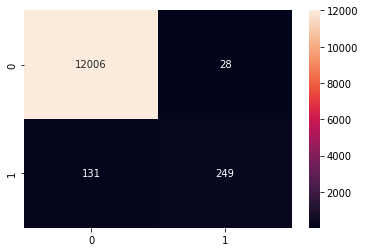

In [25]:
print(classification_report(y_test, predictions5))
conf_matrix = confusion_matrix(y_test, predictions5)
sns.heatmap(conf_matrix, annot=True, fmt="d")

,features
age,0.613212
store_name,0.172159
length_of_service,0.160230


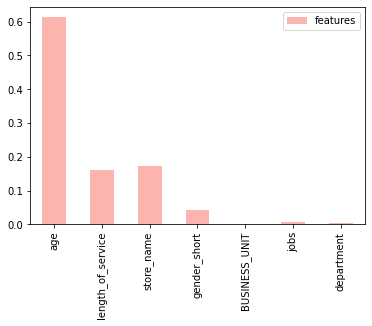

In [23]:
feature_importances = pd.DataFrame(data=model5.feature_importances_, index=X.columns, columns=['features'])
feature_importances.plot(kind='bar', colormap='Pastel1')
feature_importances.sort_values(by='features', ascending=False).head(3)